Подключаем необходимые библиотеки

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Импортируем данные из csv-файла

In [267]:
url = 'https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv'
data = pd.read_csv(url, sep=',')

Вывод первых строк датасета

In [268]:
data.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


Вывод информации о столбцах и типах

In [269]:
data.info() # информацию о столбцах и типах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


Вывод базовой описательной статистики

In [270]:
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


Вывод доли пропусков в каждом столбце

In [271]:
data.isna().mean()

,0
user_id,0.00000
age,0.04878
country,0.00000
purchases,0.00000
revenue,0.00000


Проверка наличия полностью дублирующих строк

In [272]:
data.duplicated(keep='first')

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


### Найдем подозрительные случаи в датасете:


1. Проверка отрицательного количества покупок

In [273]:
negative_purchases = data[data['purchases'] < 0]
negative_purchases

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


2. Проверка отрицательной выручки

In [274]:
negative_revenue = data[data['revenue'] < 0]
negative_revenue

,user_id,age,country,purchases,revenue


3. Проверка возраста (меньше 10 лет или больше 100 лет)

In [275]:
unrealistic_age = data[(data['age'] < 10) | (data['age'] > 100)]
unrealistic_age

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488


5. Проверка нулевых покупок при ненулевой выручке

In [276]:
zero_purchases_nonzero_revenue = data[(data['purchases'] == 0) & (data['revenue'] > 0)]
zero_purchases_nonzero_revenue

,user_id,age,country,purchases,revenue


6. Проверка ненулевых покупок при нулевой выручке

In [277]:
nonzero_purchases_zero_revenue = data[(data['purchases'] > 0) & (data['revenue'] == 0)]
nonzero_purchases_zero_revenue

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


7. Проверка наличия пропущенных значений возрастов

In [278]:
missing_age = data[data['age'].isna()]
missing_age

,user_id,age,country,purchases,revenue
4,5,NaN,DE,6,1296
12,13,NaN,US,9,630


> В датасете были обнаружены такие аномалии, как отрицательное количество покупок, отрицательная выручка, нереалистичный возраст, ненулевых покупок при нулевой выручке, наличие пропущенных значений возрастов.

Частоты для страны

In [279]:
country_counts = data['country'].value_counts()
country_counts

,count
country,
RU,13
FR,12
US,8
DE,6
CN,2


Осмысленная группировка с агрегатами для стран

In [280]:
country_analysis = data.groupby('country').agg({
    'user_id': 'count', # количество пользователей
    'age': 'mean', # средний возраст
    'purchases': ['mean', 'sum', 'min', 'max'], # статистика по покупкам
    'revenue': ['mean', 'sum', 'min', 'max'] # статистика по выручке
}).round(2)

country_analysis.columns = [
    'Кол-во пользователей',
    'Средний возраст',
    'Средние покупки',
    'Всего покупок',
    'Мин покупки',
    'Макс покупки',
    'Средний чек',
    'Общая выручка',
    'Мин выручка',
    'Макс выручка'
]

country_analysis


,Кол-во пользователей,Средний возраст,Средние покупки,Всего покупок,Мин покупки,Макс покупки,Средний чек,Общая выручка,Мин выручка,Макс выручка
country,,,,,,,,,,
CN,2,24.00,4.50,9,2,7,1054.00,2108,456,1652
DE,6,34.60,6.50,39,3,11,1445.50,8673,702,2475
FR,12,46.25,4.25,51,-1,7,675.92,8111,0,1608
RU,13,30.08,4.77,62,0,8,790.08,10271,0,2086
US,8,36.71,4.62,37,3,9,557.38,4459,0,980




> Доминируют Россия (RU) и Франция (FR) по количеству пользователей (13 и 12 соответственно), а также по общему объёму покупок и выручке. При этом Германия (DE) выделяется самыми высокими средними показателями: наибольшими средними покупками (6.5) и самым высоким средним чеком (1445.5). Это говорит о высокой покупательской способности немецких пользователей. США (US), несмотря на значительное число пользователей (8), показывают самый низкий средний чек (557.38), что указывает на более мелкие или бюджетные транзакции.



Дополнительные коридоры и возрастные группы



In [281]:
data_clean_age = data.dropna(subset=['age']).copy()

ages_bins = [0, 18, 25, 35, 50, 65, 150]
ages_labels = ['Дети (<18)', 'Молодежь (18-25)', 'Взрослые (26-35)',
               'Средний возраст (36-50)', 'Старший (51-65)', 'Пенсионеры (>65)']

data_clean_age['age_group'] = pd.cut(data_clean_age['age'], bins=ages_bins, labels=ages_labels, right=False)
data_clean_age

,user_id,age,country,purchases,revenue,age_group
0,1,25.0,FR,7,749,Взрослые (26-35)
1,2,24.0,RU,5,1115,Молодежь (18-25)
2,3,52.0,FR,7,399,Старший (51-65)
3,4,31.0,RU,6,654,Взрослые (26-35)
5,6,120.0,FR,-1,785,Пенсионеры (>65)
6,7,46.0,RU,0,0,Средний возраст (36-50)
7,8,28.0,CN,2,456,Взрослые (26-35)
8,9,39.0,US,4,980,Средний возраст (36-50)
9,10,24.0,RU,7,511,Молодежь (18-25)
10,11,24.0,US,4,0,Молодежь (18-25)


Группировка по возрастным группам с агрегатами

In [282]:
age_group_analysis = data_clean_age.groupby('age_group', observed=True).agg({
    'user_id': 'count', # количество пользователей
    'purchases': ['mean', 'sum', 'median'], # покупки
    'revenue': ['mean', 'sum', 'median'], # выручка
    'country': lambda x: x.mode()[0] # самая частая страна
}).round(2)

# Переименовываем колонки
age_group_analysis.columns = [
    'Кол-во пользователей',
    'Средние покупки', 'Всего покупок', 'Медиана покупок',
    'Средняя выручка', 'Общая выручка', 'Медиана выручки',
    'Самая частая страна'
]

age_group_analysis

,Кол-во пользователей,Средние покупки,Всего покупок,Медиана покупок,Средняя выручка,Общая выручка,Медиана выручки,Самая частая страна
age_group,,,,,,,,
Дети (<18),1,8.00,8,8.0,1488.00,1488,1488.0,RU
Молодежь (18-25),10,4.70,47,5.0,617.10,6171,511.0,RU
Взрослые (26-35),10,5.30,53,6.0,1009.60,10096,701.5,FR
Средний возраст (36-50),11,4.18,46,4.0,870.55,9576,828.0,US
Старший (51-65),6,5.00,30,6.0,596.67,3580,546.0,FR
Пенсионеры (>65),1,-1.00,-1,-1.0,785.00,785,785.0,FR




> Наиболее активными и ценными являются группы «Взрослые (26-35)» и «Средний возраст (36-50)». Они лидируют по общему количеству пользователей, покупок и выручки. Группа «Взрослые (26-35)» имеет самый высокий средний чек (1009.6), что делает её самой доходной категорией. Неожиданным эффектом можно считать низкие средние покупки и выручку у «Молодёжи (18-25)» (средний чек 617,1), хотя это одна из самых многочисленных групп (10 пользователей). Это может говорить либо на скромный бюджет, либо на специфику их потребительского поведения. Также выделяется аномалия в категории «Пенсионеры (>65)», где зафиксированы отрицательные значения покупок (-1), что, вероятно, является ошибкой данных.



ГИСТОГРАММА для количественного признака (возраст)

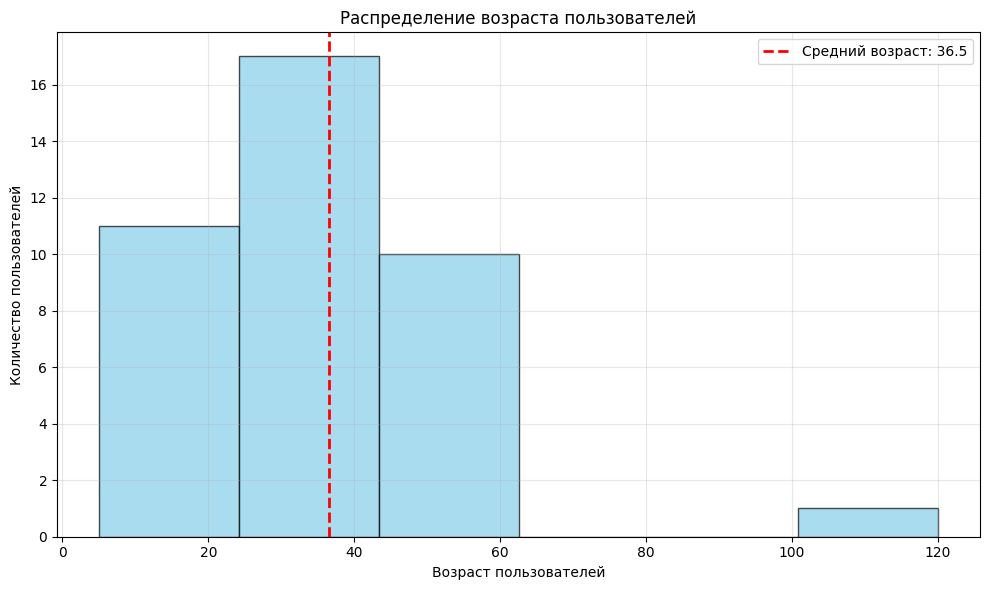

In [283]:
plt.figure(figsize=(10, 6))
n = len(data['age'].dropna())
bins = int(1 + 3.322 * np.log10(n))  # Формула Стёрджеса

plt.hist(data['age'].dropna(), bins=bins, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Возраст пользователей')
plt.ylabel('Количество пользователей')
plt.title('Распределение возраста пользователей')
plt.grid(True, alpha=0.3)

# Добавляем среднее значение
mean_age = data['age'].mean()
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2,
            label=f'Средний возраст: {mean_age:.1f}')
plt.legend()
plt.tight_layout()
plt.show()



> Возраст пользователей распределен нормально (кроме аномалии с возрастом от 101 до 120 лет) с центром около 36.5 лет. Есть небольшой пик в молодой возрастной группе (24-44 лет).



БОКСПЛОТ для количественного признака (выручка по странам)

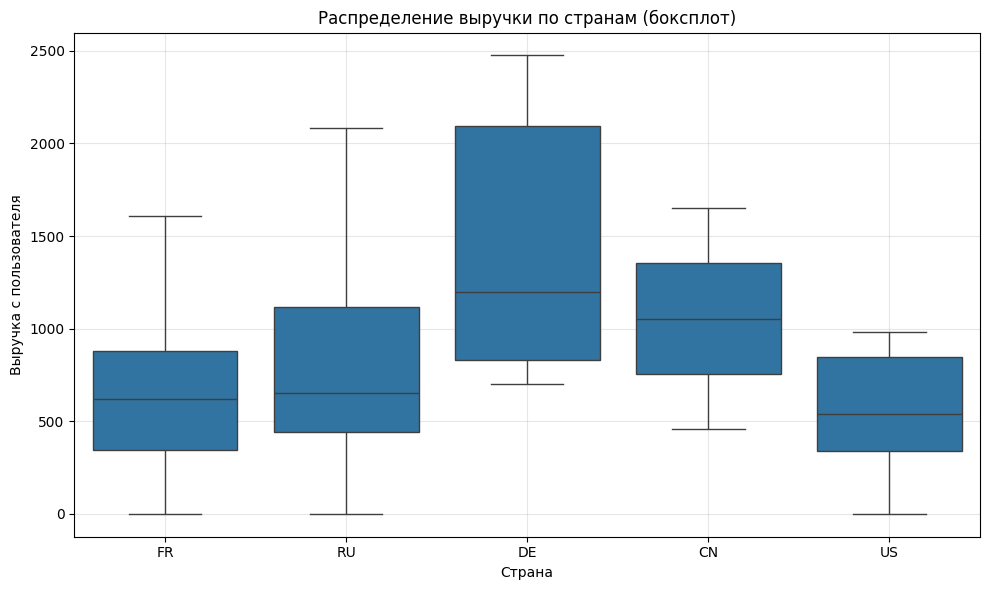

In [284]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=data, x='country', y='revenue')
plt.xlabel('Страна')
plt.ylabel('Выручка с пользователя')
plt.title('Распределение выручки по странам (боксплот)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



> В Германии (DE) самая высокая медианная выручка и наибольший разброс (есть как скромные, так и очень крупные покупки).

> Во Франции (FR) и США (US) по сравнению с другимим странами распределение более сжатое, без экстремально высоких значений.

> В США (US) самая низкая медианная выручка.

SCATTER PLOT (диаграмма рассеяния) для пары количественных признаков

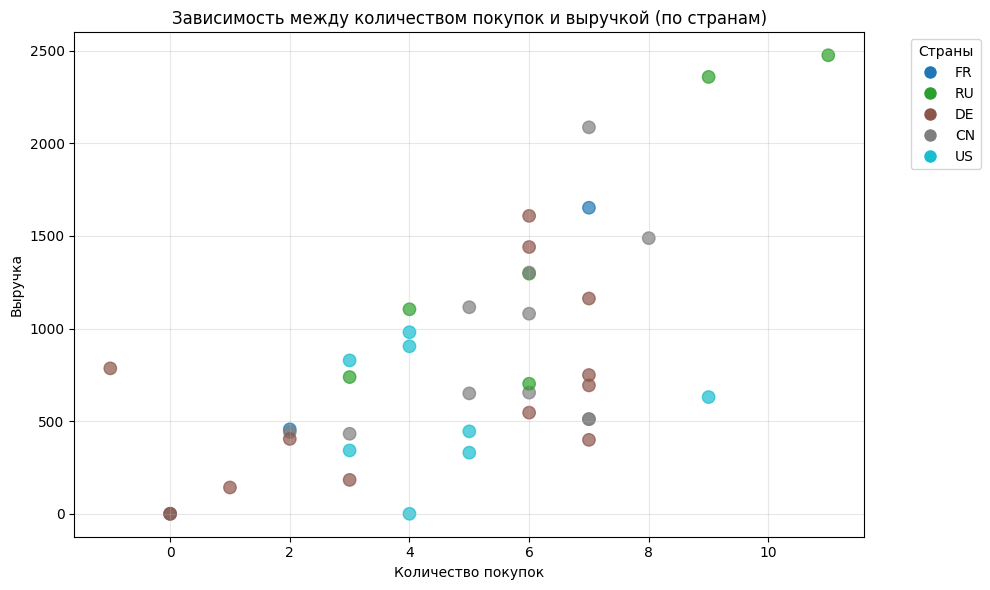

<Figure size 640x480 with 0 Axes>

In [286]:
plt.figure(figsize=(10, 6))

# Создаем scatter plot с цветовой кодировкой по странам
scatter = plt.scatter(data['purchases'], data['revenue'],
                      c=pd.Categorical(data['country']).codes,
                      cmap='tab10', alpha=0.7, s=80)
plt.xlabel('Количество покупок')
plt.ylabel('Выручка')
plt.title('Зависимость между количеством покупок и выручкой (по странам)')

# Создаем легенду для стран
countries = data['country'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(countries)))
handles = [plt.Line2D([0], [0], marker='o', color='w',
                     markerfacecolor=colors[i], markersize=10, label=country)
           for i, country in enumerate(countries)]
plt.legend(handles=handles, title='Страны', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



> Наблюдается положительная тенденция: больше покупок = выше выручка. Но есть значительный разброс: некоторые пользователи с малым числом покупок приносят высокую выручку (дорогие товары), а некоторые с многими покупками - низкую (дешевые товары). Русские пользователи (зеленые точки) чаще попадают в область высоких значений выручки. Также присутствуют аномалии - точки с ненулевым количестом покупок и нулевой выручкой.

